# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key


# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

595

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# URL & API key
url ="http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 

In [15]:
# set empty lists for the dataframe
city_name = []
cloudinesses = []
dates = []
humidities = []
lats = []
lngs = []
max_temps = []
wind_speeds = []
countries = []

# set initial count quantities for organization
count_one = 0
set_one = 1

# loops for creating dataframe columns
for city in cities:
    try:
        response = requests.get(f"{url}&q={city}").json() 
        cloudinesses.append(response['clouds']['all'])
        countries.append(response['sys']['country'])
        dates.append(response['dt'])
        humidities.append(response['main']['humidity'])
        lats.append(response['coord']['lat'])
        lngs.append(response['coord']['lon'])
        max_temps.append(response['main']['temp_max'])
        wind_speeds.append(response['wind']['speed'])
        if count_one > 48:
            count_one = 1
            set_one += 1
            city_name.append(city)
        else:
            count_one += 1
            city_name.append(city)
        print(f"Processing Record {count_one} of Set {set_one} | {city}")
    except Exception:
        print("City not found. Skipping...")
print("------------------------------\nData Retrieval Complete\n------------------------------")

Processing Record 1 of Set 1 | mae hong son
City not found. Skipping...
Processing Record 2 of Set 1 | albany
City not found. Skipping...
Processing Record 3 of Set 1 | nome
Processing Record 4 of Set 1 | punta arenas
Processing Record 5 of Set 1 | birakan
Processing Record 6 of Set 1 | victoria
City not found. Skipping...
Processing Record 7 of Set 1 | hithadhoo
Processing Record 8 of Set 1 | upernavik
Processing Record 9 of Set 1 | puerto ayora
Processing Record 10 of Set 1 | caravelas
Processing Record 11 of Set 1 | pevek
Processing Record 12 of Set 1 | butaritari
Processing Record 13 of Set 1 | tuktoyaktuk
Processing Record 14 of Set 1 | green river
Processing Record 15 of Set 1 | pangnirtung
Processing Record 16 of Set 1 | avarua
Processing Record 17 of Set 1 | stokmarknes
Processing Record 18 of Set 1 | hilo
Processing Record 19 of Set 1 | new norfolk
Processing Record 20 of Set 1 | mahebourg
Processing Record 21 of Set 1 | nizhniy baskunchak
Processing Record 22 of Set 1 | kapaa

City not found. Skipping...
Processing Record 45 of Set 4 | narsaq
Processing Record 46 of Set 4 | vernon
Processing Record 47 of Set 4 | mapiripan
City not found. Skipping...
Processing Record 48 of Set 4 | mao
Processing Record 49 of Set 4 | quatre cocos
Processing Record 1 of Set 5 | inverell
Processing Record 2 of Set 5 | buraydah
Processing Record 3 of Set 5 | santa cruz del sur
Processing Record 4 of Set 5 | francistown
Processing Record 5 of Set 5 | kudahuvadhoo
Processing Record 6 of Set 5 | hirara
Processing Record 7 of Set 5 | saldanha
Processing Record 8 of Set 5 | dalaba
City not found. Skipping...
Processing Record 9 of Set 5 | marawi
Processing Record 10 of Set 5 | tottori
Processing Record 11 of Set 5 | neunkirchen
Processing Record 12 of Set 5 | pacifica
Processing Record 13 of Set 5 | san isidro
City not found. Skipping...
Processing Record 14 of Set 5 | egvekinot
Processing Record 15 of Set 5 | kochki
Processing Record 16 of Set 5 | agirish
Processing Record 17 of Set

Processing Record 33 of Set 8 | roanoke rapids
Processing Record 34 of Set 8 | ballina
Processing Record 35 of Set 8 | port macquarie
Processing Record 36 of Set 8 | ostrovnoy
City not found. Skipping...
Processing Record 37 of Set 8 | poyarkovo
Processing Record 38 of Set 8 | bukachacha
Processing Record 39 of Set 8 | ancud
Processing Record 40 of Set 8 | murdochville
Processing Record 41 of Set 8 | portage
Processing Record 42 of Set 8 | lata
Processing Record 43 of Set 8 | general cepeda
City not found. Skipping...
Processing Record 44 of Set 8 | tata
Processing Record 45 of Set 8 | nanlong
Processing Record 46 of Set 8 | nokha
Processing Record 47 of Set 8 | plattsburgh
Processing Record 48 of Set 8 | pringsewu
Processing Record 49 of Set 8 | santa cruz
City not found. Skipping...
Processing Record 1 of Set 9 | kitimat
Processing Record 2 of Set 9 | tazovskiy
Processing Record 3 of Set 9 | idil
Processing Record 4 of Set 9 | ismailia
Processing Record 5 of Set 9 | bodden town
Proce

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
# Creating Weather Dictionnary
weather_dict = {
    "City":city_name,
    "Cloudiness":cloudinesses,
    "Country":countries,
    "Date":dates,
    "Humidity":humidities,
    "Latitude":lats,
    "Longitude":lngs,
    "Max Temp":max_temps,
    "Wind Speed":wind_speeds
}

# Creating Dataframe from Dictionnary
weather_df = pd.DataFrame(weather_dict)

# Show results


weather_df.count()

City          531
Cloudiness    531
Country       531
Date          531
Humidity      531
Latitude      531
Longitude     531
Max Temp      531
Wind Speed    531
dtype: int64

In [7]:
# Output Dataframe to CSV

weather_df.to_csv(output_data_file)

weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temp,Wind Speed
0,mae hong son,81,MM,1559606773,95,19.30,97.96,71.00,1.41
1,albany,1,US,1559606705,53,42.65,-73.75,57.99,4.70
2,nome,1,US,1559606774,49,30.04,-94.42,91.40,4.70
3,punta arenas,0,CL,1559606774,85,-53.16,-70.91,35.01,3.36
4,birakan,11,RU,1559606774,54,49.02,131.70,69.20,1.81


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

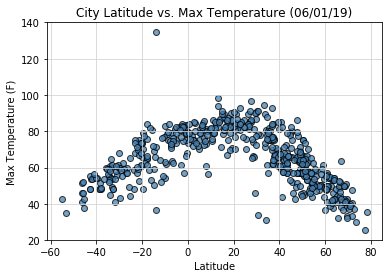

In [13]:
# Setting up Scatter Plot for Latitude vs Temperature
plt.scatter(weather_df["Latitude"],weather_df["Max Temp"],edgecolors="black",facecolors="steelblue",alpha=0.75)
plt.title("City Latitude vs. Max Temperature (06/01/19)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid (linestyle="-",color="lightgrey")
plt.savefig("LatvsTemp.png")
plt.show()

#### Latitude vs. Humidity Plot

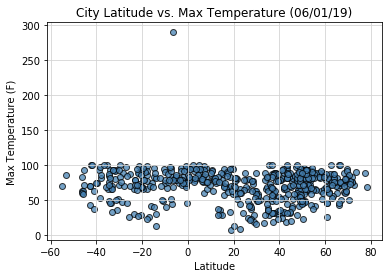

In [14]:
# Setting up Scatter Plot for Latitude vs Humidity
plt.scatter(weather_df["Latitude"],weather_df["Humidity"],edgecolors="black",facecolors="steelblue", alpha=0.75)
plt.title("City Latitude vs. Max Temperature (06/01/19)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid (linestyle="-",color="lightgrey")
plt.savefig("LatvsHum.png")
plt.show()


#### Latitude vs. Cloudiness Plot

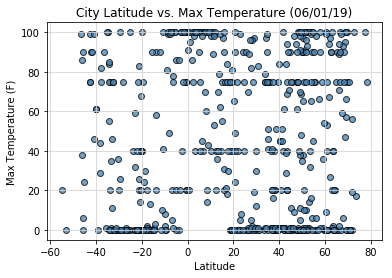

In [11]:
# Setting up Scatter Plot for Latitude vs Cloudiness
plt.scatter(weather_df["Latitude"],weather_df["Cloudiness"],edgecolors="black",facecolors="steelblue", alpha=0.75)
plt.title("City Latitude vs. Max Temperature (06/01/19)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid (linestyle="-",color="lightgrey")
plt.savefig("LatvsCloud.png")
plt.show()

#### Latitude vs. Wind Speed Plot

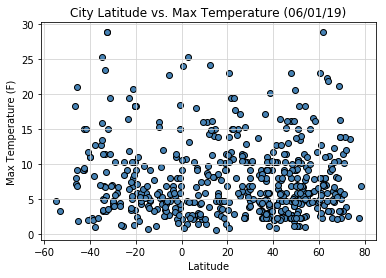

In [12]:
# Setting up Scatter Plot for Latitude vs Cloudiness
plt.scatter(weather_df["Latitude"],weather_df["Wind Speed"],edgecolors="black",facecolors="steelblue", alpha=1)
plt.title("City Latitude vs. Max Temperature (06/01/19)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid (linestyle="-",color="lightgrey")
plt.savefig("LatvsWind.png")
plt.show()